In [175]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [176]:
import numpy as np
import keras
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import * 
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

from keras.preprocessing import image


# Path for train, valid, test
TRAIN = 'sample-dog-cat/train'
VALID = 'sample-dog-cat/valid'
TEST  = 'sample-dog-cat/test'


In [177]:
train_batch = ImageDataGenerator().flow_from_directory(TRAIN, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)
valid_batch = ImageDataGenerator().flow_from_directory(VALID, target_size=(224,224), classes=['dogs', 'cats'], batch_size=4)
test_batch = ImageDataGenerator().flow_from_directory(TEST, target_size=(224,224), classes=['dogs', 'cats'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [178]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [179]:
imgs, labels = next(train_batch)

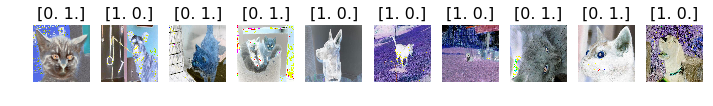

In [180]:
plots(imgs, titles=labels)

In [181]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
])

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_11 (Flatten)         (None, 1577088)           0         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
model.fit_generator(train_batch, steps_per_epoch=4, validation_data=valid_batch, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 117s - loss: 8.8395 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 3s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 2s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


In [185]:
tst_imgs, tst_labels = next(test_batch)

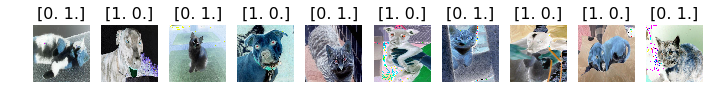

In [186]:
plots(tst_imgs, titles=tst_labels)

In [187]:
tst_labels = tst_labels[:,0]
tst_labels

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0.], dtype=float32)

In [188]:
predictions = model.predict_generator(test_batch, steps=1, verbose=1)

1/1 [==============================] - 2s 2s/step


In [189]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [190]:
cm = confusion_matrix(tst_labels, predictions[:,0])

In [191]:
cm_plot_labels = ['cats', 'dogs']

In [192]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


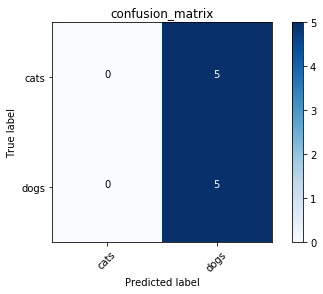

In [193]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')